In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
print('torch cifar 10')

torch cifar 10


In [2]:
?torch.utils.data.DataLoader

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                      download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False,num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
          'deer','dog','frog','horse','ship','trunk')




Files already downloaded and verified
Files already downloaded and verified


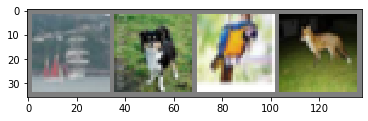

 ship   dog  bird   dog


In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    img = img/2+0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s'%classes[labels[j]] for j in range(4)))


In [5]:
type(dataiter)

torch.utils.data.dataloader._DataLoaderIter

In [6]:
?torchvision.utils.make_grid


In [7]:
# define a cnn
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
net = Net()

        

In [8]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

In [9]:
for epoch in range(2):
    running_loss = 0.0
    for i,data in enumerate(trainloader,0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i%2000 == 1999:
            print('[%d, %5d] loss: %.3f'%
                 (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
            
print('Finishied Training')



[1,  2000] loss: 2.265
[1,  4000] loss: 1.921
[1,  6000] loss: 1.685
[1,  8000] loss: 1.584
[1, 10000] loss: 1.524
[1, 12000] loss: 1.479
[2,  2000] loss: 1.405
[2,  4000] loss: 1.384
[2,  6000] loss: 1.344
[2,  8000] loss: 1.320
[2, 10000] loss: 1.316
[2, 12000] loss: 1.280
Finishied Training


In [11]:
?torch.nn.optimizer


Object `torch.nn.optimizer` not found.


In [12]:
?optimizer

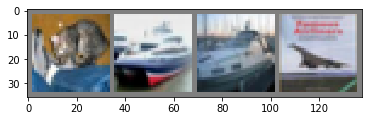

GroundTruth:    cat  ship  ship plane


In [13]:
dataiter = iter(testloader)
images, labels =  dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s'%classes[labels[j]] for j in range(4)))


In [14]:
outputs = net(images)

In [15]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s'%classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship  ship plane


In [17]:
# test the whole dataset
correct = 0
total = 0
with torch.no_grad():
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    
print('Accuracy of the network on the 10000 test images: %d %%'%(100*correct/total))


Accuracy of the network on the 10000 test images: 75 %


In [19]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
print(class_correct)
print(class_total)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [21]:
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted==labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s: %2d %%'%\
          (classes[i], 100*class_correct[i]/class_total[i]))


Accuracy of plane: 53 %
Accuracy of   car: 56 %
Accuracy of  bird: 34 %
Accuracy of   cat: 17 %
Accuracy of  deer: 47 %
Accuracy of   dog: 62 %
Accuracy of  frog: 62 %
Accuracy of horse: 67 %
Accuracy of  ship: 81 %
Accuracy of trunk: 64 %


In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# test on GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net.to(device)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted==labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s: %2d %%'%\
          (classes[i], 100*class_correct[i]/class_total[i]))


cuda:0


RuntimeError: CUDA error: unknown error

In [25]:
torch._C._cuda_init()

RuntimeError: CUDA error: unknown error

In [26]:

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False,num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer','dog','frog','horse','ship','trunk')


# define a cnn
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# train on CPU
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finishied Training')

# test on GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s: %2d %%' % (classes[i], 100*class_correct[i]/class_total[i]))





Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.189
[1,  4000] loss: 1.817
[1,  6000] loss: 1.659
[1,  8000] loss: 1.588
[1, 10000] loss: 1.516
[1, 12000] loss: 1.496
[2,  2000] loss: 1.395
[2,  4000] loss: 1.390
[2,  6000] loss: 1.351
[2,  8000] loss: 1.332
[2, 10000] loss: 1.312
[2, 12000] loss: 1.279
Finishied Training


RuntimeError: CUDA error: unknown error